In [1]:
# 기본적인 패키지 import

import numpy as np 
import pandas as pd 
import scipy as sp

import matplotlib as mpl 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 한글, 마이너스 부호 깨짐 방지
from matplotlib import rc
import matplotlib.font_manager as fm 

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 패션 MNIST 데이터

#### 데이터 load

In [3]:
from tensorflow import keras 
from tensorflow.keras.datasets.fashion_mnist import load_data
from sklearn.model_selection import train_test_split

In [4]:
(train_input, train_target), (test_input, test_target) = load_data()

In [5]:
train_input.shape

(60000, 28, 28)

In [6]:
train_scaled = train_input / 255.0

In [7]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [8]:
print(train_scaled.shape, train_target.shape)
print(val_scaled.shape, val_target.shape)

(48000, 28, 28) (48000,)
(12000, 28, 28) (12000,)


#### 모델생성 함수

In [9]:
def model_fn(a_layer=None):
    model = keras.Sequential(name='model_fn_MakeModel')
    model.add(keras.layers.Flatten(input_shape=(28,28))) # 2차원 입력값을 1차원으로 변경
    model.add(keras.layers.Dense(100, activation='relu', name='hidden'))

    if a_layer:
        model.add(a_layer)
        
    model.add(keras.layers.Dense(10, activation='softmax', name='output'))

    return model

In [10]:
model = model_fn(keras.layers.Dense(100, activation='relu', name='hidden2'))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 hidden2 (Dense)             (None, 100)               10100     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


### 손실곡선, 정확도

In [11]:
model = model_fn()
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
histroy = model.fit(train_scaled, train_target, epochs=5, verbose=2) # verbose=2 > 진행바가 안나오는 설정

Epoch 1/5
1500/1500 - 2s - loss: 0.5324 - accuracy: 0.8112 - 2s/epoch - 2ms/step
Epoch 2/5
1500/1500 - 2s - loss: 0.3951 - accuracy: 0.8575 - 2s/epoch - 1ms/step
Epoch 3/5
1500/1500 - 2s - loss: 0.3575 - accuracy: 0.8722 - 2s/epoch - 1ms/step
Epoch 4/5
1500/1500 - 2s - loss: 0.3344 - accuracy: 0.8809 - 2s/epoch - 1ms/step
Epoch 5/5
1500/1500 - 2s - loss: 0.3200 - accuracy: 0.8859 - 2s/epoch - 1ms/step


In [13]:
histroy.history

{'loss': [0.5323891639709473,
  0.3950839936733246,
  0.35745203495025635,
  0.3343900442123413,
  0.31996774673461914],
 'accuracy': [0.8112083077430725,
  0.8575208187103271,
  0.8722083568572998,
  0.8808541893959045,
  0.885895848274231]}

#### 손실곡선 차트

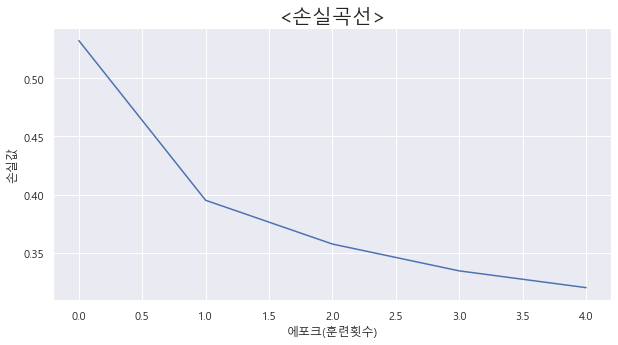

In [14]:
plt.figure(figsize=(10,5))
plt.plot(histroy.history['loss'])
plt.title('<손실곡선>', fontsize=20)
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('손실값')
plt.show()

#### 정확도 차트

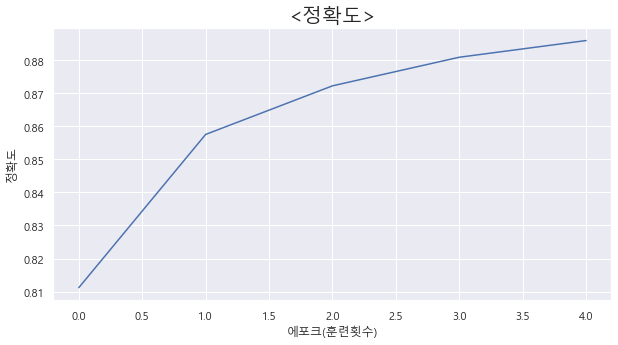

In [15]:
plt.figure(figsize=(10,5))
plt.plot(histroy.history['accuracy'])
plt.title('<정확도>', fontsize=20)
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('정확도')
plt.show()

#### 에포크 20번으로 늘려 훈련 

In [16]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
histroy = model.fit(train_scaled, train_target, epochs=20)

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5382 - accuracy: 0.8107
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3973 - accuracy: 0.8576
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3570 - accuracy: 0.8717
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3354 - accuracy: 0.8795
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3182 - accuracy: 0.8848
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3079 - accuracy: 0.8894
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2984 - accuracy: 0.8946
Epoch 8/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.2900 - accuracy: 0.8973
Epoch 9/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2849 - accuracy: 0.8990
Epoch 10/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.277

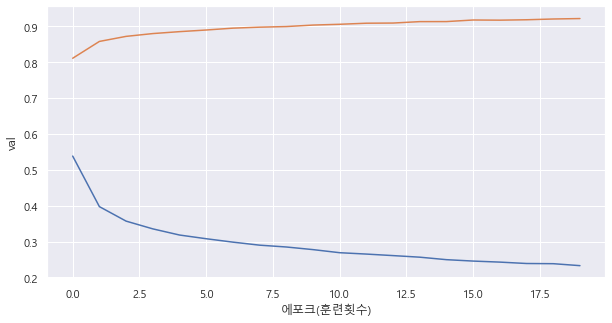

In [17]:
plt.figure(figsize=(10,5))
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['accuracy'])
# plt.title('<정확도>', fontsize=20)
plt.xlabel('에포크(훈련횟수)')
plt.ylabel('val')
plt.show()

#### 검증손실

훈련세트로 훈련 -> 정확도 92%

In [18]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
histroy = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target)) # 검증데이터(val_scaled, val_target)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5370 - accuracy: 0.8112 - val_loss: 0.4115 - val_accuracy: 0.8505
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3898 - accuracy: 0.8601 - val_loss: 0.3937 - val_accuracy: 0.8589
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3532 - accuracy: 0.8735 - val_loss: 0.3502 - val_accuracy: 0.8774
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3302 - accuracy: 0.8821 - val_loss: 0.3999 - val_accuracy: 0.8643
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3178 - accuracy: 0.8877 - val_loss: 0.3469 - val_accuracy: 0.8823
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3064 - accuracy: 0.8925 - val_loss: 0.3556 - val_accuracy: 0.8815
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8958 - val_loss: 0.3625 - val_accuracy:

##### 훈련 결과

- 훈련세트 : loss=0.2273, accuracy=0.9223
- 검증세트 : val_loss=0.5171, val_accuracy=0.8759

-> 훈련세트가 검증세트보다 손실, 정확도가 둘다 높음 (과대적합)

In [19]:
histroy.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

#### 훈련세트 / 검증세트 비교

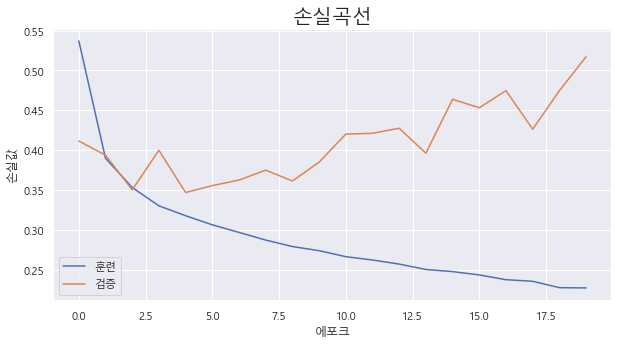

In [20]:
plt.figure(figsize=(10,5))
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])

plt.title('손실곡선', fontsize=20)
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증']) # 범례
plt.show()

머신러닝에서는 과대적합과 과소적합 사이로 균형을 맞추기 위해 규제로 '릿지/라쏘모델의 알파 값'을 조정했지만

딥러닝에서는 규제로 '드롭아웃'을 이용함

#### 드롭아웃

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "model_fn_MakeModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 hidden (Dense)              (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
histroy = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5882 - accuracy: 0.7927 - val_loss: 0.4529 - val_accuracy: 0.8363
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4508 - accuracy: 0.8404 - val_loss: 0.3912 - val_accuracy: 0.8602
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4194 - accuracy: 0.8529 - val_loss: 0.3850 - val_accuracy: 0.8668
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4098 - accuracy: 0.8590 - val_loss: 0.3827 - val_accuracy: 0.8670
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3963 - accuracy: 0.8642 - val_loss: 0.3881 - val_accuracy: 0.8664
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3937 - accuracy: 0.8649 - val_loss: 0.3901 - val_accuracy: 0.8681
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3904 - accuracy: 0.8677 - val_loss: 0.3957 - val_accuracy:

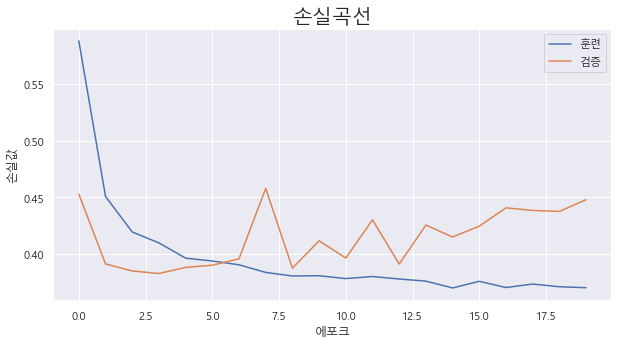

In [23]:
plt.figure(figsize=(10,5))
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])

plt.title('손실곡선', fontsize=20)
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증']) # 범례
plt.show()

In [24]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')
histroy = model.fit(train_scaled, train_target, epochs=20, validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3685 - accuracy: 0.8736 - val_loss: 0.4029 - val_accuracy: 0.8691
Epoch 2/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3456 - accuracy: 0.8772 - val_loss: 0.4068 - val_accuracy: 0.8721
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3338 - accuracy: 0.8790 - val_loss: 0.4086 - val_accuracy: 0.8776
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3322 - accuracy: 0.8811 - val_loss: 0.3762 - val_accuracy: 0.8773
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3200 - accuracy: 0.8807 - val_loss: 0.3984 - val_accuracy: 0.8687
Epoch 6/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3134 - accuracy: 0.8831 - val_loss: 0.3646 - val_accuracy: 0.8791
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3051 - accuracy: 0.8859 - val_loss: 0.3901 - val_accuracy:

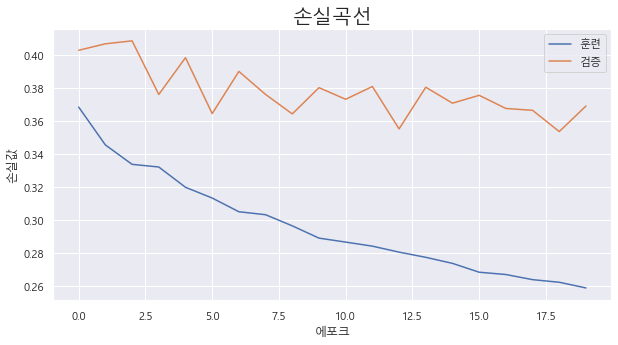

In [25]:
plt.figure(figsize=(10,5))
plt.plot(histroy.history['loss'])
plt.plot(histroy.history['val_loss'])

plt.title('손실곡선', fontsize=20)
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증']) # 범례
plt.show()

모델을 새로 만들지 않고 계속해서 훈련을 시켰기 때문에 결과가 좋지 않음

#### 모델 저장 / 로드

In [27]:
# 훈련된 가중치만 저장
model.save_weights('./data/model-weights.h5')

In [28]:
# 훈련된 전체 데이터 저장
model.save('./data/model.h5')

##### 가중치 모델 load

In [30]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('./data/model-weights.h5')

In [31]:
# 모델을 가중치만 불러왔기 때문에 오류가 남
model.evaluate(val_scaled, val_target)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

##### 전체모델 load

In [32]:
model = keras.models.load_model('./data/model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3692 - accuracy: 0.8857


[0.3691595196723938, 0.8857499957084656]

가중치만 저장하면 모델 기능에 제약이 있음 -> 모델 전체 데이터를 저장하면 모든 기능 수행 가능

In [33]:
model.predict(val_scaled)

375/375 [==============================] - 0s 1ms/step


array([[7.7106483e-23, 0.0000000e+00, 2.8913766e-31, ..., 8.7959639e-16,
        1.0000000e+00, 1.1206572e-21],
       [4.3012579e-16, 0.0000000e+00, 1.2456638e-24, ..., 9.5613860e-22,
        1.0000000e+00, 8.4787159e-28],
       [1.4111887e-19, 1.0511894e-27, 4.0335314e-25, ..., 9.9997115e-01,
        8.1459434e-16, 6.6686491e-14],
       ...,
       [1.0016227e-07, 6.9669813e-28, 1.0467968e-14, ..., 2.9853997e-17,
        9.9999988e-01, 4.2577778e-19],
       [4.4756001e-18, 0.0000000e+00, 4.5815168e-22, ..., 2.6814812e-24,
        1.0000000e+00, 1.2814584e-27],
       [3.1882839e-03, 1.5102999e-13, 1.4425573e-13, ..., 2.6866511e-01,
        1.8542333e-11, 7.0854336e-01]], dtype=float32)

In [34]:
# 예측 결과 보기(위 코드보다 이 방법이 더 예측 결과를 보기 편함)
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.88575

#### 콜백(Callback)

In [35]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# best model을 저장할 콜백 
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5902 - accuracy: 0.7929 - val_loss: 0.4214 - val_accuracy: 0.8500
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4399 - accuracy: 0.8419 - val_loss: 0.3829 - val_accuracy: 0.8590
Epoch 3/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4039 - accuracy: 0.8532 - val_loss: 0.3696 - val_accuracy: 0.8632
Epoch 4/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3814 - accuracy: 0.8607 - val_loss: 0.3537 - val_accuracy: 0.8702
Epoch 5/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3675 - accuracy: 0.8664 - val_loss: 0.3399 - val_accuracy: 0.8725
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3537 - accuracy: 0.8694 - val_loss: 0.3384 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 2s 2ms/step - loss: 0.3446 - accuracy: 0.8721 - val_loss: 0.3239 - val_accuracy:

In [36]:
# 체크포인트 확인
model = keras.models.load_model('./data/best_model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 1ms/step - loss: 0.3246 - accuracy: 0.8838


[0.32462409138679504, 0.8838333487510681]

#### 조기 종료

In [53]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

# best model을 저장할 콜백 
checkpoint_cb = keras.callbacks.ModelCheckpoint('./data/best_model2.h5', save_best_only=True, verbose=1)
# save_best_only=True : 가장 좋은 모델이 저장되는 설정
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)
# patience : 손실값이 갑자기 급변할 때 몇 번이나 참고 넘길건지
# restore_best_weights=True : 손실값이 갑자기 급변하기 이전의 값으로 돌리는 설정
history = model.fit(train_scaled, train_target, epochs=20, verbose=1, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1471/1500 [============================>.] - ETA: 0s - loss: 0.5904 - accuracy: 0.7918
Epoch 1: val_loss improved from inf to 0.42256, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5881 - accuracy: 0.7925 - val_loss: 0.4226 - val_accuracy: 0.8466
Epoch 2/20
1486/1500 [============================>.] - ETA: 0s - loss: 0.4390 - accuracy: 0.8414
Epoch 2: val_loss improved from 0.42256 to 0.38021, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4397 - accuracy: 0.8411 - val_loss: 0.3802 - val_accuracy: 0.8609
Epoch 3/20
1494/1500 [============================>.] - ETA: 0s - loss: 0.4040 - accuracy: 0.8538
Epoch 3: val_loss improved from 0.38021 to 0.36799, saving model to ./data\best_model2.h5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4041 - accuracy: 0.8538 - val_loss: 0.3680 - val_accuracy: 0.8648
Epoch 4/20
1476/1500 [===================

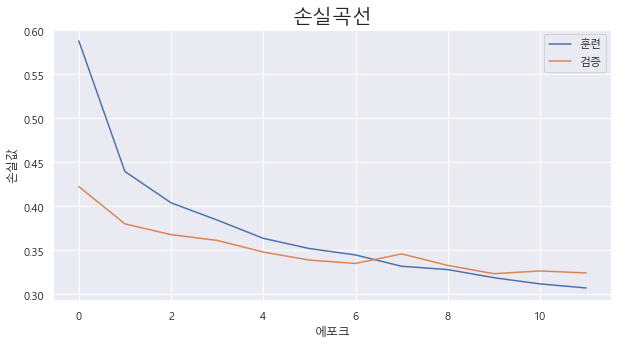

In [61]:
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('손실곡선', fontsize=20)
plt.xlabel('에포크')
plt.ylabel('손실값')
plt.legend(['훈련', '검증']) # 범례
plt.show()

In [55]:
# 어느 에포크에서 조기종료했는지 확인
early_stopping_cb.stopped_epoch # 11번째 에포크에서 멈춤(드랍아웃)

11

In [56]:
model.evaluate(val_scaled, val_target) # 10번째 에포크값

375/375 [==============================] - 1s 1ms/step - loss: 0.3236 - accuracy: 0.8827


[0.3236294388771057, 0.8827499747276306]

In [59]:
model_cp = keras.models.load_model('./data/best_model2.h5')
model_cp.evaluate(val_scaled, val_target)

375/375 [==============================] - 0s 1ms/step - loss: 0.3236 - accuracy: 0.8827


[0.3236294388771057, 0.8827499747276306]

In [62]:
# 예측 결과 보기
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
np.mean(val_labels == val_target)

375/375 [==============================] - 0s 1ms/step


0.88275